# Ejercicios - Práctica 4: Compilación de programas

### Optimización del código gracias al compilador


- Pega el siguiente código en Compiler Explorer (https://godbolt.org/).

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}

```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA: Traduce el codigo de alto nivel a lenguaje maquina 


- Añade la opción `-O0` (la letra «o» mayúscula, seguida del número cero) a los parámetros pasados al compilador. Esta opción establece el nivel de optimización del compilador a 0 (desactivado). Una vez que el programa se compile, aparecerá en el centro el código ensamblador generado. Haz una captura de pantalla del código ensamblador generado y pégalo en la siguiente celda

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O0`? 

RESPUESTA: 

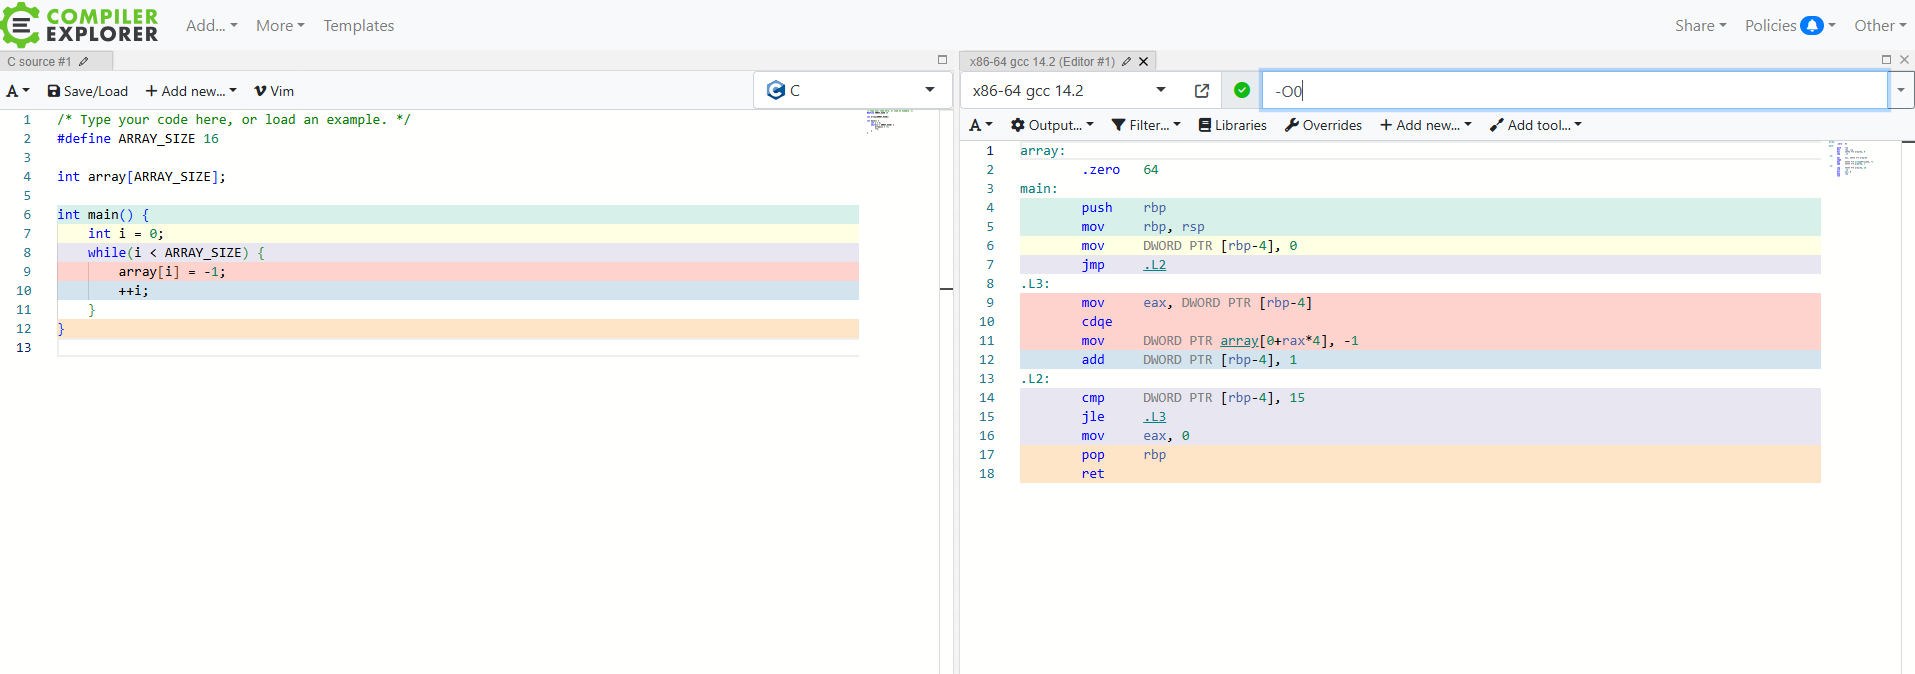


In [ ]:
#IV.11
#IV.8
#IV.5
#IV.4
#IV.2


- Ahora, establece el nivel 1 de optimización del compilador, sustituyendo `-O0` por `-O1`. Luego, vuelve a hacer una captura de las instrucciones generadas.

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O1`? 

RESPUESTA: 9


PREGUNTA: A la vista del código fuente en C, y sabiendo que en el ISA x86, la instrucción `jne .L2` realiza un salto a la instrucción marcada con la etiqueta `.L2:`, ¿cuántas veces se ejecutará la instrucción `movl    $-1, (%rax)`?

RESPUESTA: Se ejecutara 16 veces, ya que el ARRAY_SIZE es 16.


PREGUNTA: A la vista del número de instrucciones que conforman la traducción del bucle *while*, y teniendo en cuenta el número de iteraciones del mismo que se llevan a cabo, ¿cuántas instrucciones, aproximadamente, se ejecutarán para completar el programa? 

RESPUESTA: Se ejecutaran 48 instrucciones para la completar el programa, ya que en cada ciclo del bucle se ejecutan 3 instrucciones, y asi 16 veces.


- Por último, establece el nivel 2 de optimización del compilador, sustituyendo `-O1` por `-O2`. Luego, vuelve a hacer una captura de las instrucciones generadas.

PREGUNTA: ¿Cuántas instrucciones contiene el programa compilado con `-O2`? 

RESPUESTA:


PREGUNTA: A la vista de que no hay ninguna instrucción de salto (`jne`) en el programa generado, ¿cuántas instrucciones, exactamente, se ejecutarán para completar el programa esta vez?


RESPUESTA: 7 instrucciones.


**MIDIENDO EL RENDIMIENTO**

Ejecuta la siguiente celda para generar el fichero `array_write.c` con el código fuente del programa anterior. Fíjate que la única diferencia con el programa que hemos compilado mediante la aplicación web de *Compiler explorer* es que ahora el array es de tamaño mucho mayor (2^22, algo más de 4 millones de elementos). Trabajar con un array más grande conlleva más instrucciones ejecutadas y nos permite medir el tiempo total que tarda el programa en ejecutarse de manera más precisa y menos sensible a perturbaciones por factores externos al programa.

In [55]:
# Ejecuta esta celda para generar el fichero array_write.c
cat <<EOF > array_write.c
#define ARRAY_SIZE (1 << 22)

int array[ARRAY_SIZE];

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
EOF

Ahora, compila el programa en C anterior directamente a un ejecutable, usando el nivel de optimización 0. El programa ejecutable se debe llamar `array_write_O0`. 

In [56]:
gcc -O0 array_write.c -o array_write_O0

Repite lo anterior, pero usando el nivel de optimización 2 y llamando  `array_write_O2` al ejecutable generado. 

In [57]:
gcc -O2 array_write.c -o array_write_O2

Por último, ejecuta las siguientes celdas, para medir el tiempo empleado en ejecutar cada programa:

In [58]:
time ./array_write_O0


real	0m0,039s
user	0m0,016s
sys	0m0,024s


In [59]:
time ./array_write_O2


real	0m0,016s
user	0m0,000s
sys	0m0,016s


PREGUNTA: A la vista del rendimiento (tiempo de ejecución) de cada programa y de lo visto en los ejercicios anteriores, ¿qué conclusiones sacas?

RESPUESTA: Que en el nivel de optimizacion 2 el tiempo de ejecucion es mas rapido.


### Ensamblado y desensamblado

Vamos a compilar el programa array_write.c para generar código ensamblador: `array_write.s`. La opción que ves produce una salida más *limpia* y fácilmente legible.

In [60]:
gcc -S -O1 array_write.c -fno-asynchronous-unwind-tables

In [61]:
ls -l array_write.s

-rw-r--r-- 1 jupyter-bKyYVZt1kd jupyter-bKyYVZt1kd 603 nov  4 22:10 array_write.s


Con el comando `nl`, podemos numerar las líneas de un fichero de texto.

In [62]:
nl array_write.c

     1	#define ARRAY_SIZE (1 << 22)
       
     2	int array[ARRAY_SIZE];
       
     3	int main() {
     4	    int i = 0;
     5	    while(i < ARRAY_SIZE) {
     6	        array[i] = -1;
     7	        ++i;
     8	    }
     9	}


PREGUNTA: ¿Cuántas líneas tiene el fichero de código ensamblador generado? ¿Entre qué dos números de línea está el bucle del programa?

In [63]:
#IV.1
nl array_write.s

     1		.file	"array_write.c"
     2		.text
     3		.globl	main
     4		.type	main, @function
     5	main:
     6		endbr64
     7		leaq	array(%rip), %rax
     8		leaq	16777216(%rax), %rdx
     9	.L2:
    10		movl	$-1, (%rax)
    11		addq	$4, %rax
    12		cmpq	%rdx, %rax
    13		jne	.L2
    14		movl	$0, %eax
    15		ret
    16		.size	main, .-main
    17		.globl	array
    18		.bss
    19		.align 32
    20		.type	array, @object
    21		.size	array, 16777216
    22	array:
    23		.zero	16777216
    24		.ident	"GCC: (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"
    25		.section	.note.GNU-stack,"",@progbits
    26		.section	.note.gnu.property,"a"
    27		.align 8
    28		.long	1f - 0f
    29		.long	4f - 1f
    30		.long	5
    31	0:
    32		.string	"GNU"
    33	1:
    34		.align 8
    35		.long	0xc0000002
    36		.long	3f - 2f
    37	2:
    38		.long	0x3
    39	3:
    40		.align 8
    41	4:


RESPUESTA: Tiene 41 lineas el codigo ensamblador generado y el bucle se encuentra entre las lineas 9-13.



Ensambla el fichero `array_write.s` para generar un fichero objeto `array_write.o`.

In [64]:
gcc -c  array_write.s 

In [65]:
ls -l array_write.o

-rw-r--r-- 1 jupyter-bKyYVZt1kd jupyter-bKyYVZt1kd 1160 nov  4 22:10 array_write.o


Desensambla el fichero `array_write.o`:

In [66]:
#IV.3
objdump -d array_write.o


array_write.o:     formato del fichero elf64-x86-64


Desensamblado de la sección .text:

0000000000000000 <main>:
   0:	f3 0f 1e fa          	endbr64 
   4:	48 8d 05 00 00 00 00 	lea    0x0(%rip),%rax        # b <main+0xb>
   b:	48 8d 90 00 00 00 01 	lea    0x1000000(%rax),%rdx
  12:	c7 00 ff ff ff ff    	movl   $0xffffffff,(%rax)
  18:	48 83 c0 04          	add    $0x4,%rax
  1c:	48 39 d0             	cmp    %rdx,%rax
  1f:	75 f1                	jne    12 <main+0x12>
  21:	b8 00 00 00 00       	mov    $0x0,%eax
  26:	c3                   	ret    


PREGUNTA: ¿Cuál es el tamaño en bytes del código máquina generado? ¿Cuál es el código máquina de la instrucción `ret`, expresado en binario?

RESPUESTA: Son 39 bytes y la instruccion "ret" en binario es 11000011.


### Compilar un programa compuesto por múltiples módulos

In [67]:
# Ejecuta esta celda para generar el fichero arrays_iguales.c
cat <<EOF > arrays_iguales.c
#include <stdbool.h>

int arrays_iguales(int size, int array1[], int array2[]) {
    int i = 0;
    while(i < size) {
        if (array1[i] != array2[i]) {
            return false;
        };
        ++i;
    }
    return true;
}
EOF

In [68]:
# Ejecuta esta celda para generar el fichero miprograma.c
cat <<EOF > miprograma.c
#include <stdbool.h>
#define ARRAY_SIZE 8

int a[ARRAY_SIZE] = {0,1,2,3,4,5,6,7};
int b[ARRAY_SIZE] = {0,1,2,3,4,5,6,8};

//Declaramos la función de "array_iguales.c" para poder llamarla desde main
int arrays_iguales(int size, int array1[], int array2[]); 

int main() {
    return arrays_iguales(ARRAY_SIZE, a, b);
}
EOF

PREGUNTA: ¿Qué hace este programa?

RESPUESTA:

@Comparar dos arrays de 8 enteros cada uno, haciendo uso de una función llamada "arrays_iguales", que está definida en otro fichero de código fuente.@

PREGUNTA: ¿Qué variables utiliza `miprograma.c`?

RESPUESTA: Utiliza las variables a y b.


Compila el fichero `miprograma.c` para generar un fichero objeto llamado `miprograma.o`.

In [69]:
gcc -c  miprograma.c

Compila el fichero `arrays_iguales.c` para generar un fichero objeto llamado `arrays_iguales.o`.

In [70]:
gcc -c  arrays_iguales.c

Con el comando `nm` podemos ver los símbolos (nombres de variables, funciones, etc.) que contiene un determinado fichero de código objeto. Ejemplo: `nm fichero.o`. Muestra los símbolos del fichero `miprograma.o`. Después, busca en la ayuda de `nm` la opción para mostrar únicamente los símbolos no definidos en este módulo (pero que aparecen referenciados en el módulo). A la vista de la información recabada, responde a la siguiente pregunta:

In [71]:
#IV.6
nm miprograma.o

0000000000000000 D a
                 U arrays_iguales
0000000000000020 D b
0000000000000000 T main


In [72]:
nm --help

Modo de empleo: nm [opcion(es)] [fichero(s)]
 Lista de símbolos en [fichero(s)] (a.out por defecto).
 Las opciones son:
  -a, --debug-syms       Display debugger-only symbols
  -A, --print-file-name  Print name of the input file before every symbol
  -B                     Same as --format=bsd
  -C, --demangle[=STYLE] Decode mangled/processed symbol names
                           STYLE can be "none", "auto", "gnu-v3", "java",
                           "gnat", "dlang", "rust"
      --no-demangle      Do not demangle low-level symbol names
      --recurse-limit    Enable a demangling recursion limit.  (default)
      --no-recurse-limit Disable a demangling recursion limit.
  -D, --dynamic          Display dynamic symbols instead of normal symbols
      --defined-only     Display only defined symbols
  -e                     (ignored)
  -f, --format=FORMAT    Use the output format FORMAT.  FORMAT can be `bsd',
                           `sysv', `posix' or 'just-symbols'.
              

In [73]:
#IV.7
nm -u miprograma.o

                 U arrays_iguales


PREGUNTA: ¿Cuántos símbolos contiene el fichero objeto `miprograma.o`? ¿Cuáles están definidos en el propio módulo de código objeto y cuáles no están definidos?

RESPUESTA: El fichero contiene 4 simbolos. De los cuales estan definidos en el propio modulo de codigo objeto: las variables a y b, e el int main. Mientras que los que no estan definidos son la funcion array_iguales.


PREGUNTA: Trata de compilar el fichero `miprograma.c` para generar directamente un ejecutable llamado `compara_arrays`. ¿Qué ocurre? Razona la respuesta.

In [74]:
gcc miprograma.c -o compara_arrays

/usr/bin/ld: /tmp/ccJCkGHo.o: en la función `main':
miprograma.c:(.text+0x22): referencia a `arrays_iguales' sin definir
collect2: error: ld returned 1 exit status


: 1

RESPUESTA: Salta un error debido a que no hay definida una referencia a arrays_iguales.



 Ahora usa `nm` para mostrar los símbolos del fichero objeto `arrays_iguales.o`

In [75]:
#IV.9
# Muestra todos los símbolos
nm arrays_iguales.o

0000000000000000 T arrays_iguales


In [76]:
#IV.10
# Símbolos no definidos´
nm -u arrays_iguales.o

Finalmente, escribe el comando necesario para conseguir generar un programa ejecutable llamado `compara_arrays`:

In [77]:
ld miprograma.c -o compara_arrays

ld:miprograma.c: file format not recognized; treating as linker script
ld:miprograma.c:4: syntax error


: 1

Ejecuta el programa para comprobar que devuelve un 0 (*false*), ya que los arrays `a` y `b` tienen valores distintos.

In [78]:
./compara_arrays; echo $?    # echo $? muestra el valor retornado por el último comando

bash: ./compara_arrays: No existe el archivo o el directorio
127


In [79]:
# Cleanup
FILES="
arrays_iguales.c
arrays_iguales.o
array_write.c
array_write.o
array_write_O0
array_write_O2
array_write.s
compara_arrays
miprograma.c
miprograma.o"
rm -f $FILES

# Ejercicios - Práctica 4: Ensamblador RISC-V. Ejecución con RIPES

### Escribir datos en memoria: `result = var1 - var2`

- El programa que se muestra a continuación debe restar dos variables en memoria `var1` y `var2`, y luego escribir el resultado en una tercera variable llamada `result`. Sin embargo, el programa está incompleto.

```
    .data
var1: .word 0xa0b0c0
var2: .word 0x0c
result: .word 0xffffffff

    .text

    la x4, var1			
    lw x5, 0(x4)    # (1)
    lw x6, 4(x4)    # (2)
    sub x7,x5,x6    # (3)
                    # (4) 
```

- Copia y pega el código anterior Ripes, y ejecuta hasta llegar a la instrucción marcada con (2).

PREGUNTA: A la vista de los valores de los registros, en este punto del programa ¿en qué dirección de memoria está ubicada la variable `var1`? ¿Cuál es el tamaño de dicha variable? Indica qué direcciones de memoria ocupa (inicial y final, inclusive)

RESPUESTA: 


PREGUNTA: ¿Qué instrucción habría que añadir en la línea marcada con (4) para que el programa escriba el resultado de la resta en la variable `result`?.

RESPUESTA: 



PREGUNTA: Haz una captura de pantalla que muestre el valor de los registros x4,x5 y x6 antes de ejecutar la instrucción (2). ¿De dónde procede el valor que tiene el registro x5? 

RESPUESTA:


PREGUNTA: ¿Cuál es la codificación en lenguaje máquina de la instrucción `lw x5, 0(x4)`? ¿Entre qué dos dirección de memoria se ubica dicha instrucción? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de texto (parte de la memoria donde se ubican las instrucciones del programa).

RESPUESTA:


PREGUNTA: ¿Cuál es el valor del byte en la dirección de memoria 0x10000002? Pega una captura de pantalla de la pestaña "Memory" que muestre el segmento de datos (parte de la memoria donde se ubican las variables globales del programa).

RESPUESTA:


PREGUNTA: A la vista del valor inicial de la variable `var1` (en el código ensamblador) y el valor de los bytes en que se almacena en memoria, ¿qué esquema de almacenamiento (endianness u orden de bytes) se utiliza en RISC-V? 

RESPUESTA:


PREGUNTA: ¿Cuál es el valor inicial, en decimal, de la variable `result` (en el código ensamblador)? ¿En qué direcciones de memoria se almacena? ¿Cuál es el valor hexadecimal de cada uno  de los 4 bytes en que se almacena en memoria?

RESPUESTA:


PREGUNTA: Continúa ejecutando el programa hasta el final. ¿Cuál es el valor final de la variable `result` en memoria? ¿De dónde procede el valor almacenado en dichas posiciones de memoria? Pega una captura de pantalla de la pestaña "Memory" que lo muestre. 

RESPUESTA:


### Ubicación de los datos del programa en memoria

- Entra en la configuración de Ripes (*Settings*) y asegúrate de establecer los argumentos del compilador y enlazador como se muestra en la siguiente imagen. Debes pasar **-O1** al compilador para que optimice el código y **-nostdlib** al enlazador para evitar enlazar con la biblioteca estándar. 

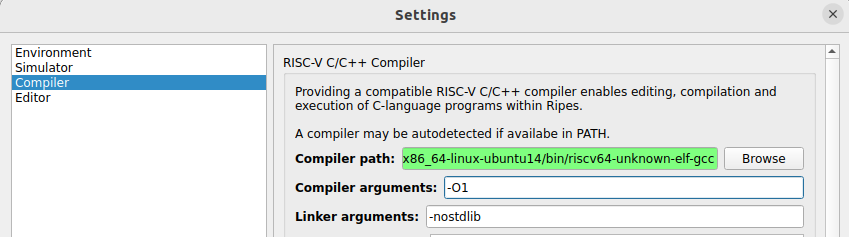

- A continuación, copia el siguiente código en el editor y compila a ensamblador.

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
        ++i;
    }
}
```

PREGUNTA: Explica brevemente lo que hace el programa.

RESPUESTA:


- Haz una captura de pantalla de la memoria ocupada por el array. Para ello, debes ir a la vista *Memory* y luego seleccionar *Go to section->.data*.

PREGUNTA: ¿Cuántos bytes ocupa el array en memoria? ¿Entre qué dos direcciones de memoria se encuentra almacenado el array? 

RESPUESTA:



PREGUNTA: ¿Entre qué dos direcciones de memoria se almacena el primer elemento del array? Indica los valores en hexadecimal de cada byte que ocupa.

RESPUESTA:



PREGUNTA: A la vista del valor inicial del primer elemento en el código C, ¿qué orden de bytes usa RISC-V?

RESPUESTA:


PREGUNTA: Ejecuta paso a paso el programa hasta completar la primera iteración del bucle. ¿Qué registro se utiliza para guardar el valor entero -1? ¿Cuál es la codificación del -1 como entero con signo de 4 bytes?

RESPUESTA:


PREGUNTA: ¿Qué instrucción es la que escribe en el array el valor -1?  ¿En qué dirección de memoria está ubicada dicha instrucción?

RESPUESTA:


PREGUNTA: Continúa ejecutando iteraciones del bucle. ¿Qué valores va tomando el registro x15? ¿Para qué se utiliza dicho registro?

RESPUESTA:


### Un error de programación habitual

- Copia y pega el siguiente programa en C en el editor. Luego, elimina la opción **-O1** de los argumentos del compilador. Finalmente, ejecuta el programa paso a paso durante algunas iteraciones del bucle, y luego cambia a la pestaña *Memory* para observar la sección *.data* mientras observas los valores del array. 

```C
#define ARRAY_SIZE 16

int array[ARRAY_SIZE] = {15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0};

int main() {
    int i = 0;
    while(i < ARRAY_SIZE) {
        array[i] = -1;
    }
}
```

PREGUNTA: ¿Qué le ocurre al programa? Sabiendo que el programador quería establecer a -1 todos los elementos del array, ¿dónde está el error?

RESPUESTA:


- El siguiente programa en ensamblador es similar al programa en C anterior (escribe el valor -1 en todos los elementos de un array). Copia y pega en Ripes, y simula paso a paso observando lo que le ocurre al programa.

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
        
    .text
main:
        la      a5, array
        addi    a3,a5,16
        li      a4, 0
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        bne     a5,a3,loop
        li      a0,0
        ret

```

PREGUNTA: ¿Qué le ocurre al programa? ¿Podrías identificar el *bug* y resolverlo?

RESPUESTA:


### Otro tipo de *bugs* bastante común

- Esta es otra versión diferente del programa que contiene un error distinto. Copia y pega el siguiente código en Ripes, y ejecuta tanto desde el editor como desde la pestaña *Memory*, observando lo que ocurre con los valores del array y de la variable "hola".

```
        .data
array:
        .word   15
        .word   14
        .word   13
        .word   12
hola:   .string "En un lugar de la Mancha, de cuyo nombre no quiero acordarme,..."
        
    .text
main:
        la      a5, array
        addi    a3,a5,-16
        li      a4, -1
loop:
        sw      a4,0(a5)
        addi    a4,a4,1
        addi    a5,a5,4
        bne     a5,a3,loop
        li      a0,0
        ret
```

PREGUNTA: ¿Qué le ocurre a este programa? ¿Cómo podrías solucionarlo? *PISTA: Fíjate en cómo se usa el registro a3 en el programa del ejercicio anterior.*)

RESPUESTA:

